# Histogram for the time of posting twitter -- John(Litao) Zhou

This is the test notebook used the twitter date that is selected to  analysize the data of **one day** for a better understanding of data science

In [2]:
#import the required libriary used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json as js
import ast
import re
import networkx as nx
from datetime import datetime

In [3]:
#open file and handle the issue of single quotes
with open(r"corona_tweets_01_data.txt", encoding="utf8") as corona_file:
    tw=[]
    line= corona_file.readlines()
    for row in range(len(line)):
        temp = ast.literal_eval(line[row])
        tw.append(temp)

    tws_df=pd.DataFrame(tw)
    print(tws_df.head())

            author_id lang                                     public_metrics  \
0  879993257031196674   en  {'retweet_count': 11963, 'reply_count': 0, 'li...   
1           226061099   en  {'retweet_count': 48775, 'reply_count': 0, 'li...   
2           473948808   en  {'retweet_count': 104, 'reply_count': 0, 'like...   
3          4652626034   en  {'retweet_count': 85671, 'reply_count': 0, 'li...   
4           350979334   en  {'retweet_count': 30587, 'reply_count': 0, 'li...   

                                            entities  \
0  {'urls': [{'start': 77, 'end': 100, 'url': 'ht...   
1  {'mentions': [{'start': 3, 'end': 14, 'usernam...   
2  {'annotations': [{'start': 38, 'end': 42, 'pro...   
3  {'mentions': [{'start': 3, 'end': 14, 'usernam...   
4  {'mentions': [{'start': 3, 'end': 17, 'usernam...   

                                 attachments  \
0  {'media_keys': ['7_1240691535768780800']}   
1                                        NaN   
2                               

------------------------------------------------------------------------------------------------------------------------------------------


**Task 1** Visualize the histagram



In [7]:
#define the helper function to do the function take out the string of time and summarize them into the hour
def process_time(df):
    time_str = df['created_at'][11:19]
    time_whole = datetime.strptime(time_str, '%H:%M:%S')
    return datetime.strftime(time_whole, '%H')

#make an empty column and apply the function
tws_df['time'] = np.NaN
tws_df['time'] = tws_df.apply(process_time, axis=1)

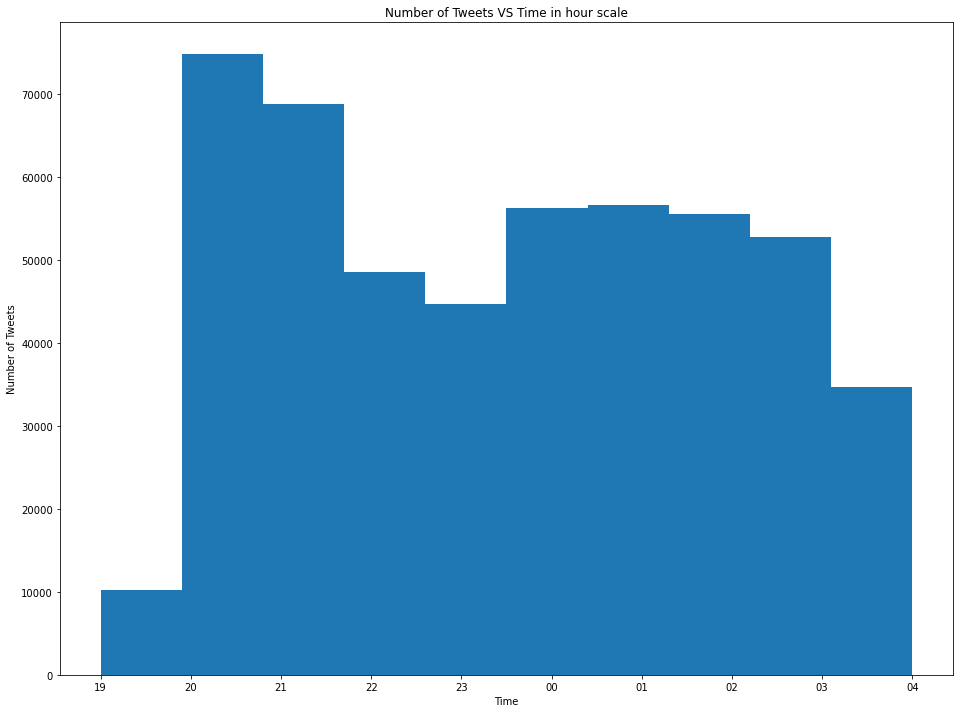

In [8]:
#plot the histogram graph
plt.figure(figsize=(16,12)) 
plt.hist(tws_df['time'])
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets VS Time in hour scale')
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------

**Task 3** Visualize the scatter plot between mention counts and retweet counts

In [6]:
#take out the number of the retweets and add the column
def count_retweets(df):
    rtw_dic =  df["public_metrics"]
    
    return rtw_dic.get("retweet_count")
    
#make an empty column and apply the function 
tws_df['retweets_counts'] = np.NaN
tws_df['retweets_counts'] = tws_df.apply(count_retweets, axis=1)



In [7]:
#take out the number of mention counts and make it into a new column

def count_mentions(df):
    #check if there is no entities as a float, and if there is, check if there is mentions
    if isinstance(df.loc['entities'],float):
        return 0
    elif 'mentions' in df['entities']:
        return len(df['entities'].get('mentions'))
    else:
        return 0
    
#make an empty column and apply the function 
tws_df['mention_counts'] = np.NaN
tws_df['mention_counts'] = tws_df.apply(count_mentions, axis=1)

    

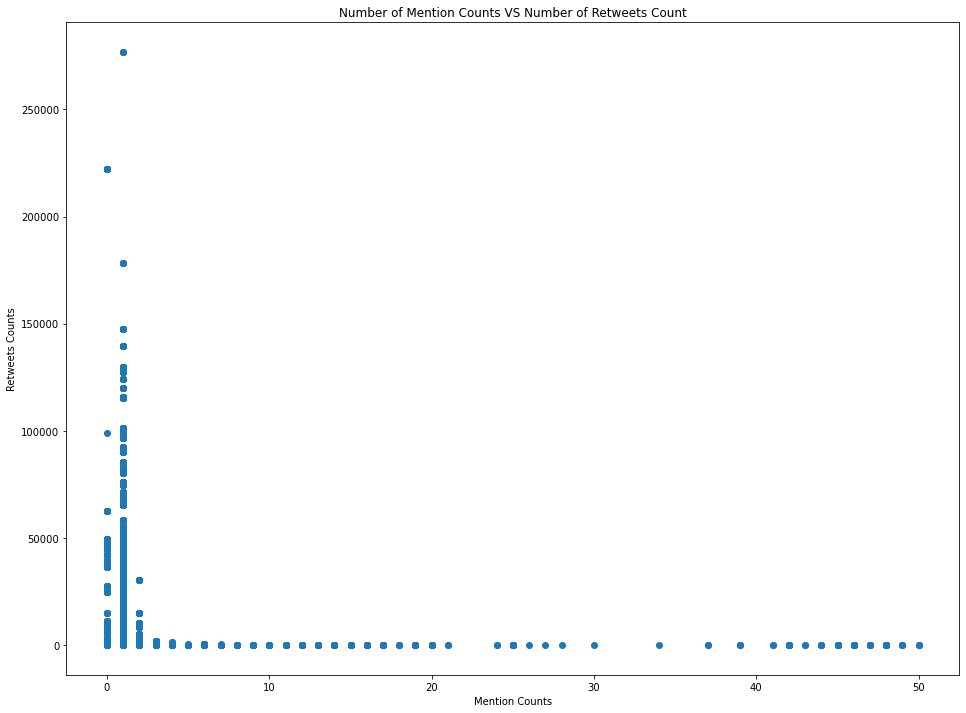

In [55]:
#draw the scatter plot
plt.figure(figsize=(16,12)) 
plt.scatter(tws_df['mention_counts'],tws_df['retweets_counts'])
plt.xlabel('Mention Counts')
plt.ylabel('Retweets Counts')
plt.title('Number of Mention Counts VS Number of Retweets Count')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------

**Task 2** networkx for the relations of users

In [30]:
#take out the value of the reference ID for the user

def refer_id(df):
    #check if there is reference tweets
    if isinstance(df['referenced_tweets'],float):
        return -1
    else:
        return int(df['referenced_tweets'][0]['id'])

    
# make an empth column and apply the function 
tws_df['reference_id'] = np.NaN

tws_df['reference_id']= tws_df.apply(refer_id,axis = 1)


In [31]:
#take out the id of the user
def users_id(df):
    return int(df['id'])

# make an empth column and apply the function 
tws_df['user_id']= np.NaN
tws_df['user_id']= tws_df.apply(users_id,axis=1)

draw the networkx for the uses could only apply and use a sample of the users since the scale of the large number (500k) is not usable,only a part of the data would be used, and I would apply different sample rates


<function matplotlib.pyplot.show(close=None, block=None)>

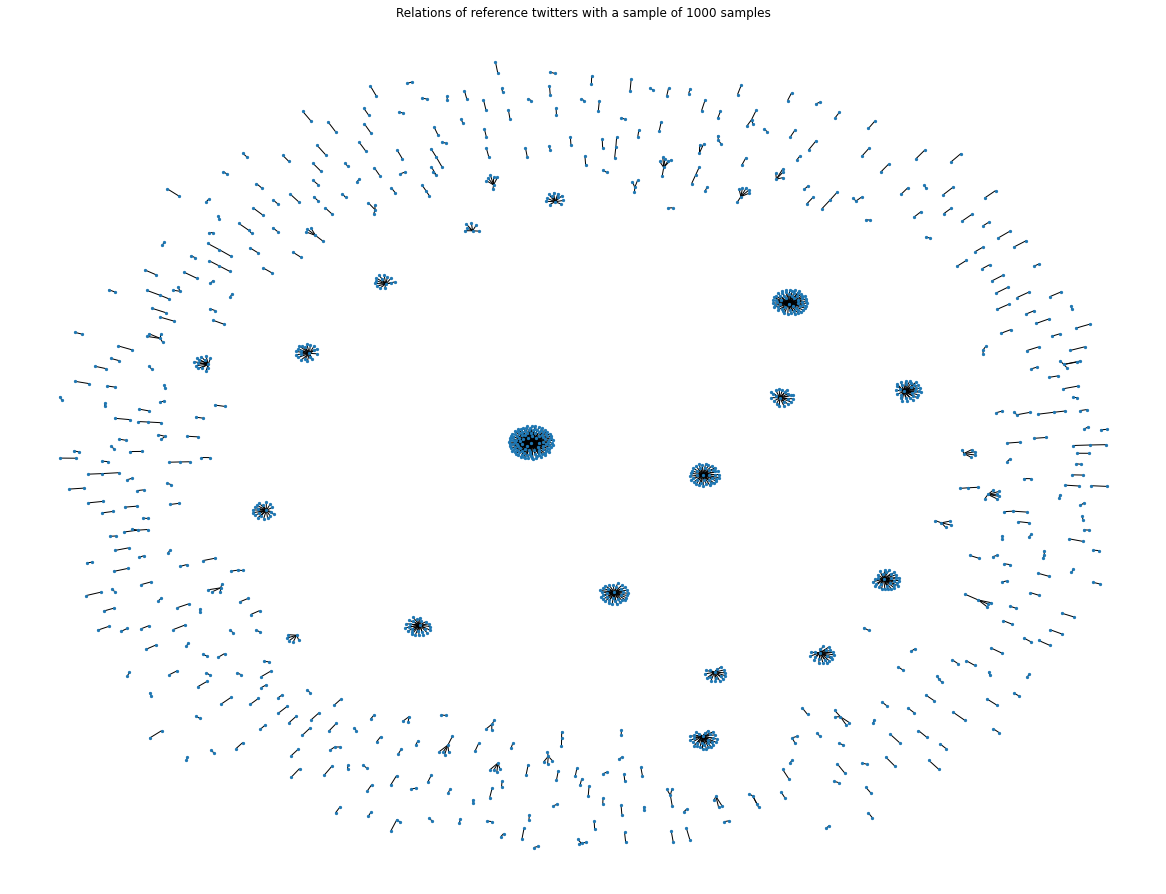

In [54]:
#sample rate of 0.002 (1000 samples)
G = nx.Graph()
G = nx.from_pandas_edgelist(tws_df.sample(frac= 0.002),'reference_id','user_id')

plt.figure(figsize=(16,12)) 
nx.draw(G,node_size=5)
plt.title('Relations of reference twitters with a sample of 1000 samples')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

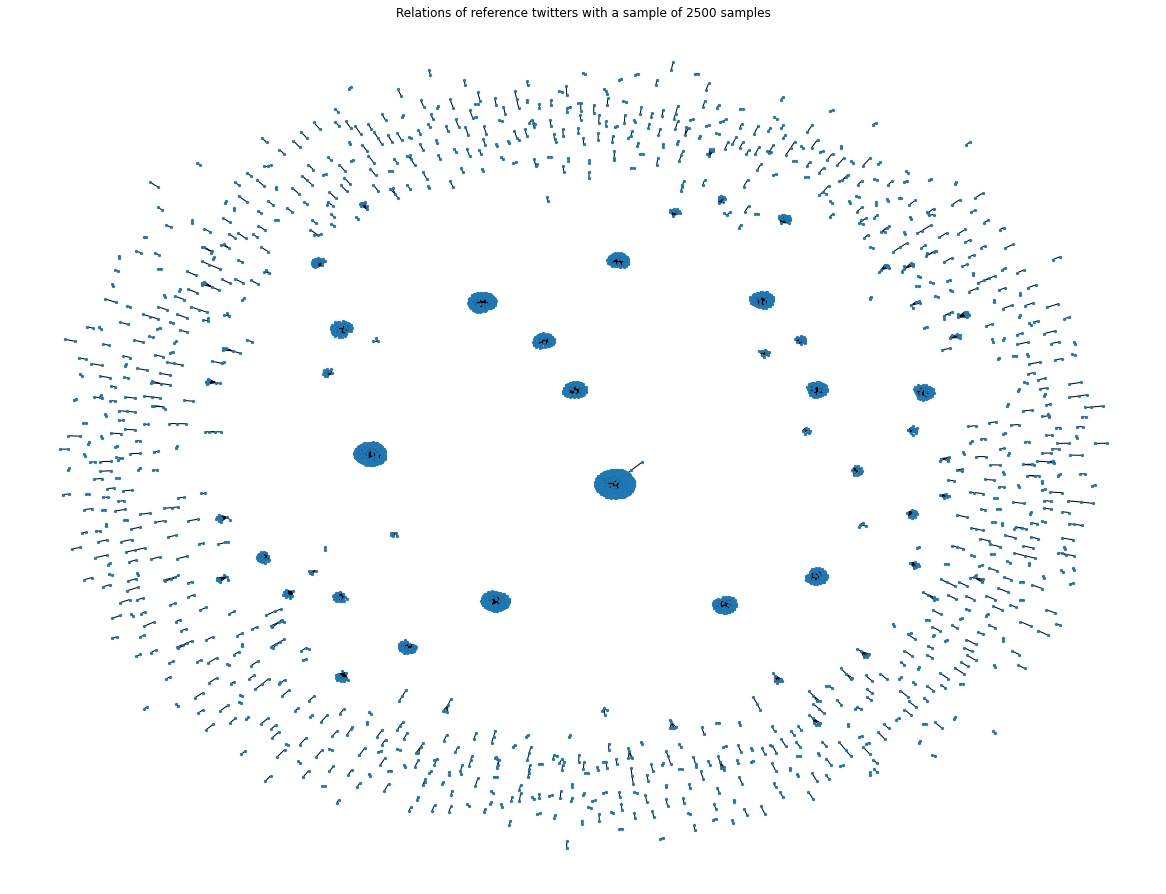

In [57]:
#sample rate of 0.005 (2500 samples)
G = nx.Graph()
G = nx.from_pandas_edgelist(tws_df.sample(frac=  0.005),'reference_id','user_id')

plt.figure(figsize=(16,12)) 
nx.draw(G,node_size=5)
plt.title('Relations of reference twitters with a sample of 2500 samples')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

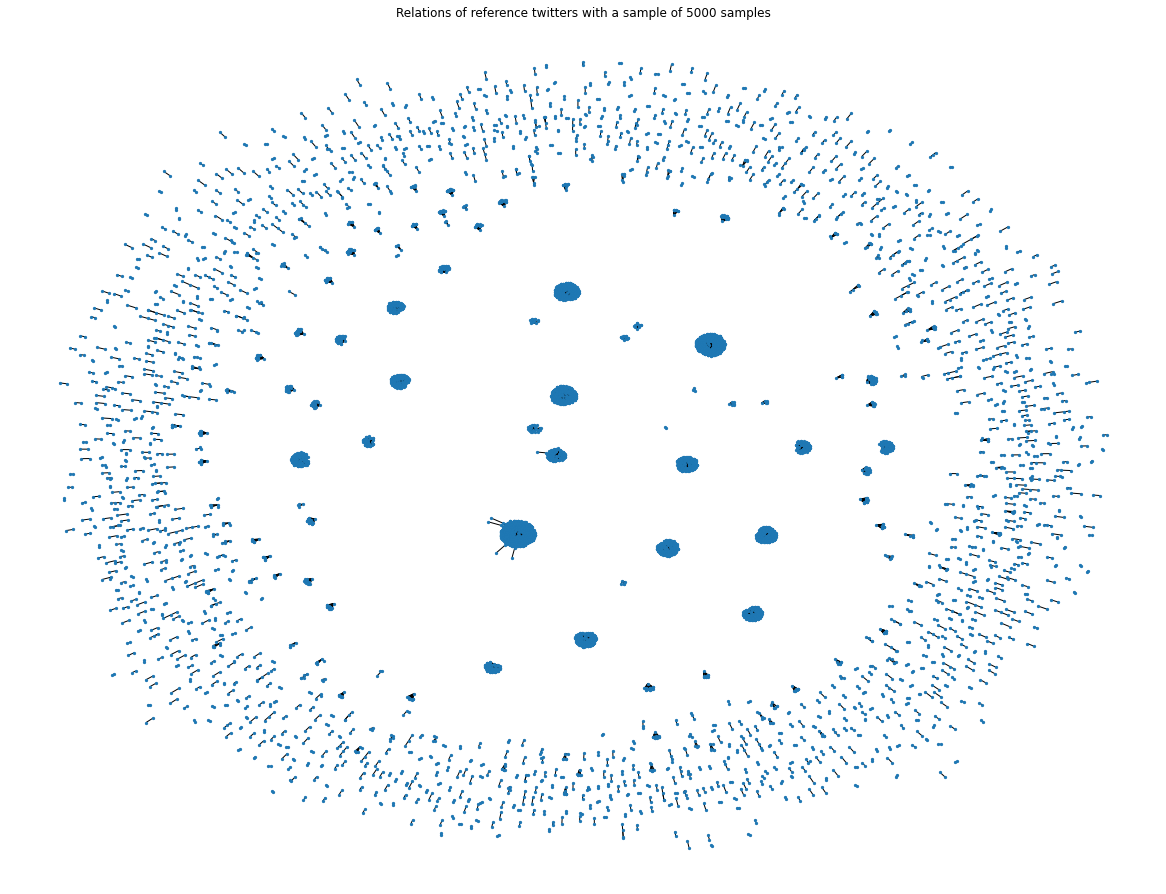

In [58]:
#sample rate of 0.01 (5000 samples)
G = nx.Graph()
G = nx.from_pandas_edgelist(tws_df.sample(frac=0.01),'reference_id','user_id')

plt.figure(figsize=(16,12)) 
nx.draw(G,node_size=5)
plt.title('Relations of reference twitters with a sample of 5000 samples')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

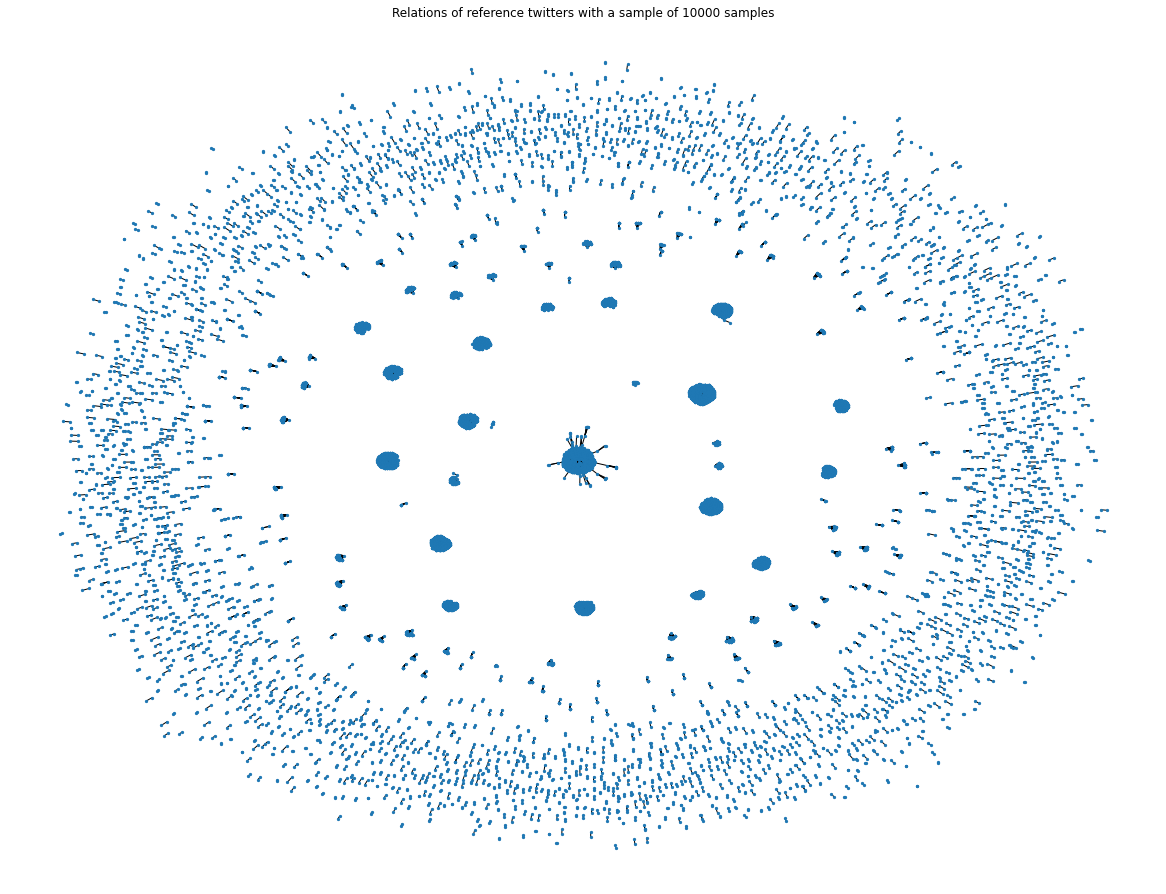

In [59]:
#sample rate of 0.02 (10000 samples)
G = nx.Graph()
G = nx.from_pandas_edgelist(tws_df.sample(frac=0.02),'reference_id','user_id')

plt.figure(figsize=(16,12)) 
nx.draw(G,node_size=5)
plt.title('Relations of reference twitters with a sample of 10000 samples')
plt.show
